# Problem Statement

The task is to predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc. The dataset is small yet, it's complexity arises due to the fact that it has strong multicollinearity. We nee to overcome these obstacles & build a decent predictive model.

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings

# Loading the dataset

In [ ]:
df = pd.read_csv("Housing.csv")
X = df.iloc[:, 1: ]
y = df['price']
print('----------------------------------------------------------------------------')
print('-------------------------- Top 10 rows of dataset --------------------------')
print('----------------------------------------------------------------------------')
print(df.head(10))
print('----------------------------------------------------------------------------')
print('---------------------------- Dataset Summary -------------------------------')
print('----------------------------------------------------------------------------')
print(df.info())
print('--------------------------------------------------------------------------')
print('-------------------- Statistics of Numerical Features --------------------')
print('--------------------------------------------------------------------------')
print(df.describe())

----------------------------------------------------------------------------
-------------------------- Top 10 rows of dataset --------------------------
----------------------------------------------------------------------------
      price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000   7420         4          2        3      yes        no       no   
1  12250000   8960         4          4        4      yes        no       no   
2  12250000   9960         3          2        2      yes        no      yes   
3  12215000   7500         4          2        2      yes        no      yes   
4  11410000   7420         4          1        2      yes       yes      yes   
5  10850000   7500         3          3        1      yes        no      yes   
6  10150000   8580         4          3        4      yes        no       no   
7  10150000  16200         5          3        2      yes        no       no   
8   9870000   8100         4          1        2 

# Plotting and Analysing the dataset (EDA)

## Plotting the Correlation Matrix

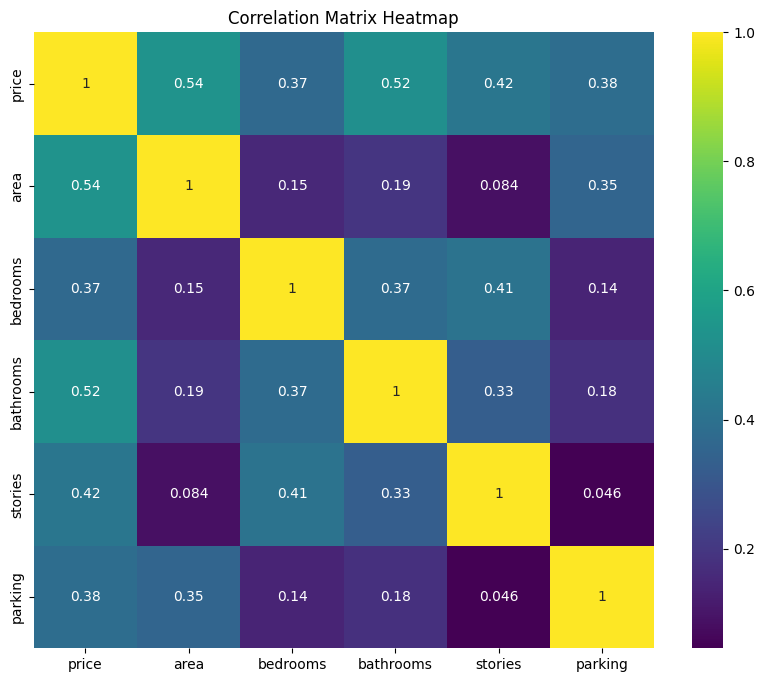

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['int64']).corr(), annot=True, cmap='viridis', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Plotting the distribution of target variable

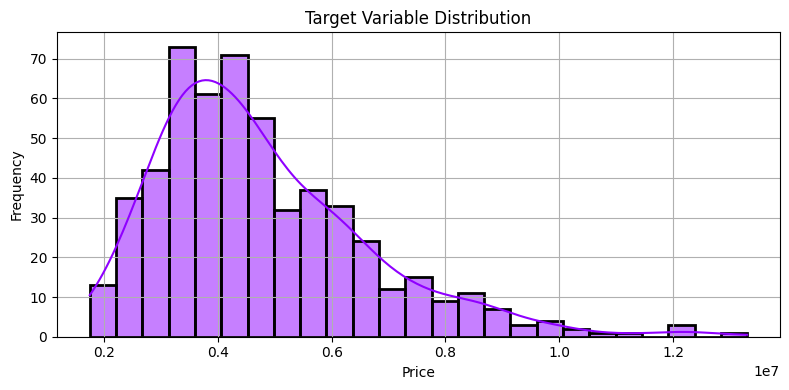

In [ ]:
plt.figure(figsize=[8, 4])
sns.histplot(y, color='#8F00FF', kde=True, bins=25, linewidth=2)
plt.title('Target Variable Distribution')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

## Plotting the distribution of discrete features

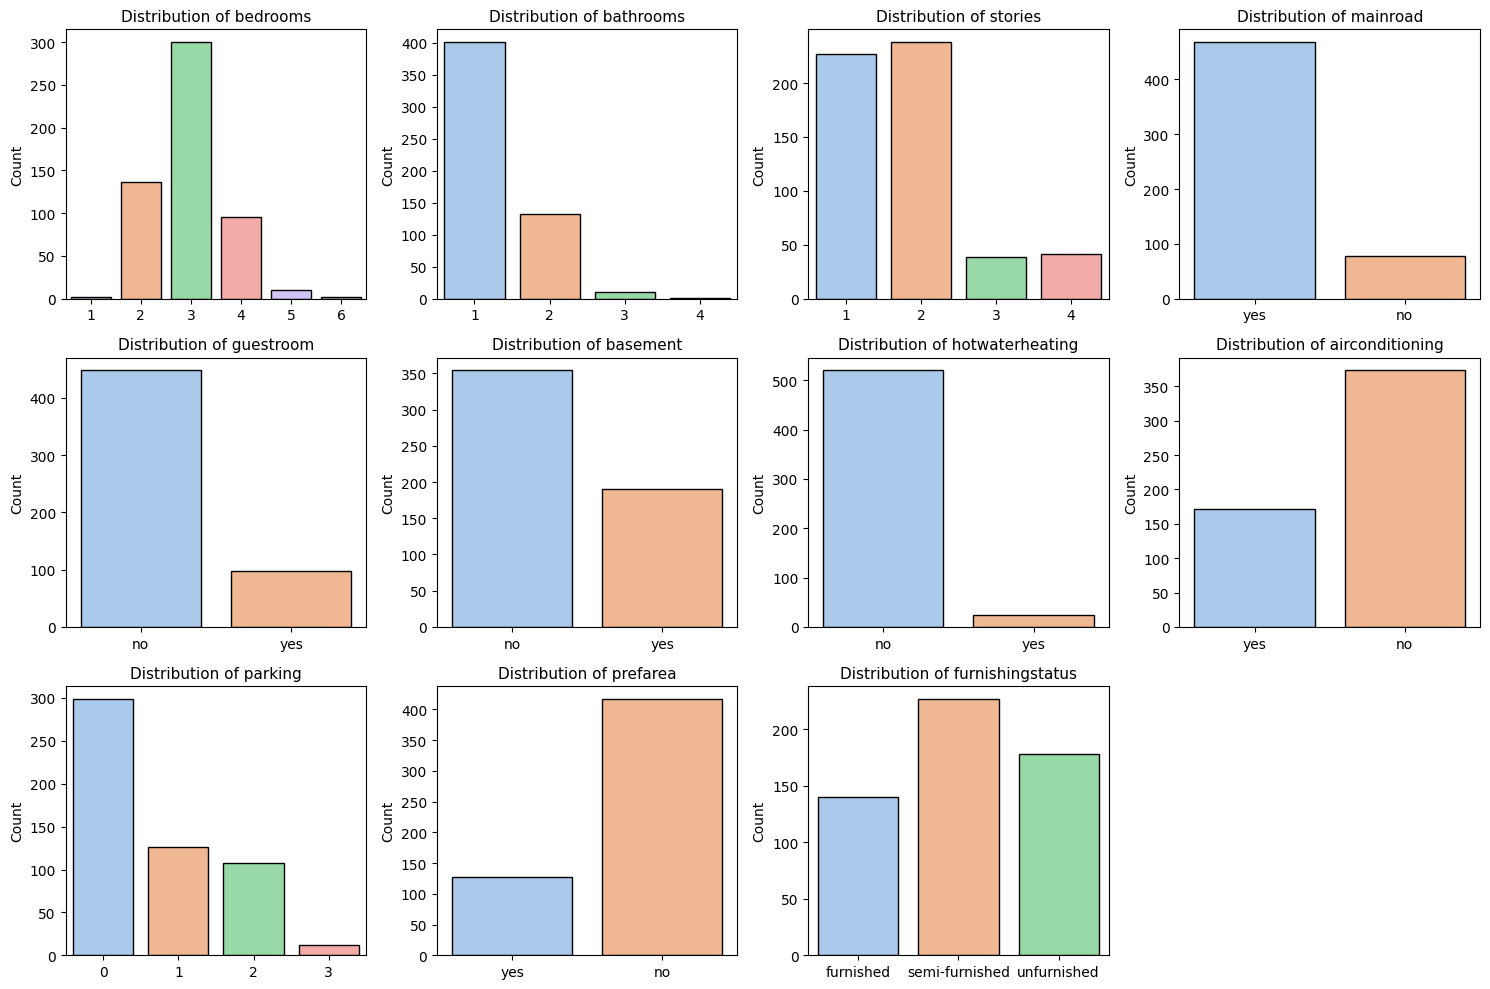

In [ ]:
categoricalFeatures = ['bedrooms', 'bathrooms', 'stories', 'mainroad',
                       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
                       'parking', 'prefarea', 'furnishingstatus']

warnings.filterwarnings('ignore')
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(categoricalFeatures):
    sns.countplot(x=df[feature], ax=axes[i], palette="pastel", edgecolor="black")
    axes[i].set_title(f'Distribution of {feature}', fontsize=11)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

for j in range(len(categoricalFeatures), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Plotting the distribution of continuous features

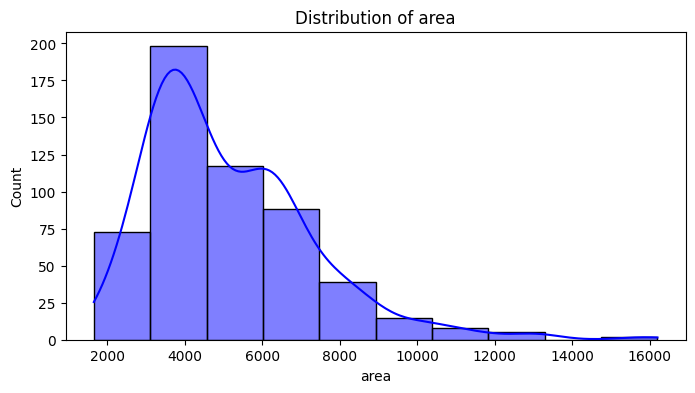

In [ ]:
plt.figure(figsize=[8, 4])
sns.histplot((X.iloc[:, 0]), color='blue', kde=True, bins=10)
plt.title('Distribution of area')
plt.show()

# Pre-Processing the dataset

Handling the categorical feature vectors:

1.   Binary features: 0/1
2.   Multinomial features: one-hot encoding

In [ ]:
binaryCols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
X[binaryCols] = X[binaryCols].apply(lambda col: col.map({'yes': 1, 'no': 0}))
X = pd.get_dummies(X, columns=['furnishingstatus']).astype(int)

* Splitting the dataset into training and test sets.
* Scaling the feature values



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)
X_train_scaled = MinMaxScaler().fit_transform(X_train)
X_test_scaled = MinMaxScaler().fit_transform(X_test)

# Model Training

In [ ]:
def generate_performanceReport(y_true, y_pred):
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  mae = mean_absolute_error(y_true, y_pred)
  r2Score = r2_score(y_true, y_pred)

  print('******************** PERFORMANCE REPORT ********************')
  print('************************************************************')
  print(f'Mean Sqaure Error:       {mse: .2f}')
  print(f'Mean Absolute Error:     {mae: .2f}')
  print(f'Root Mean Sqaure Error:  {rmse: .2f}')
  print(f'R2 Score:                {r2Score: .4f}')
  print('************************************************************')

  return r2Score

def plot_predictionAccuracy(y_true, y_pred):
  plt.figure(figsize=(8, 5))
  plt.scatter(y_true, y_pred, alpha=0.8, color='blue')
  plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--')
  plt.title('Prediction Accuracy: Actual vs Predicted Prices')
  plt.xlabel('Actual Prices')
  plt.ylabel('Predicted Prices')
  plt.tight_layout()
  plt.show()

## Linear Regression

******************** PERFORMANCE REPORT ********************
************************************************************
Mean Sqaure Error:        1451838962597.80
Mean Absolute Error:      875812.70
Root Mean Sqaure Error:   1204922.80
R2 Score:                 0.6875
************************************************************


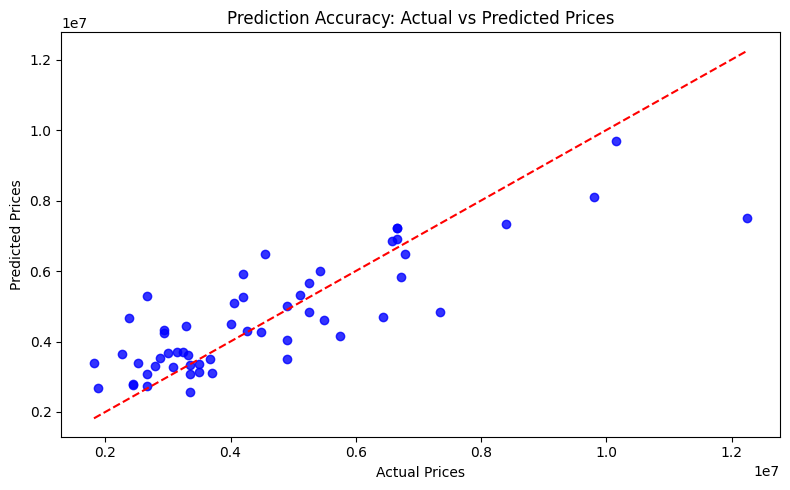

In [ ]:
from sklearn.linear_model import LinearRegression
linearRegressor = LinearRegression().fit(X_train, y_train)
y_pred = linearRegressor.predict(X_test)
LR_score = generate_performanceReport(y_test, y_pred)
plot_predictionAccuracy(y_test, y_pred)

### Ridge Linear Regression

******************** PERFORMANCE REPORT ********************
************************************************************
Mean Sqaure Error:        1451285447866.71
Mean Absolute Error:      876464.07
Root Mean Sqaure Error:   1204693.09
R2 Score:                 0.6876
************************************************************


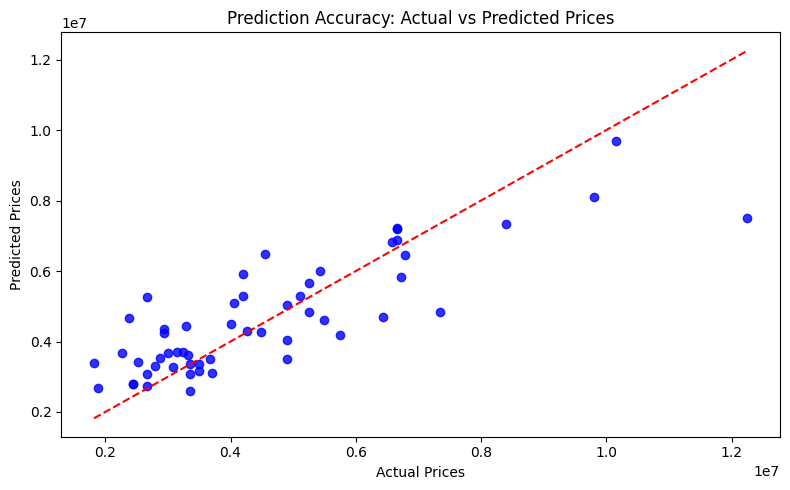

In [ ]:
from sklearn.linear_model import Ridge
ridgeRegressor = Ridge().fit(X_train, y_train)
y_pred = ridgeRegressor.predict(X_test)
ridgeRegressor_score1 = generate_performanceReport(y_test, y_pred)
plot_predictionAccuracy(y_test, y_pred)

HYPER-PARAMETER TUNING

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best Parameters found for Ridge Regressor: {'alpha': 2, 'solver': 'auto'} 

******************** PERFORMANCE REPORT ********************
************************************************************
Mean Sqaure Error:        1450797330766.89
Mean Absolute Error:      877477.35
Root Mean Sqaure Error:   1204490.49
R2 Score:                 0.6878
************************************************************


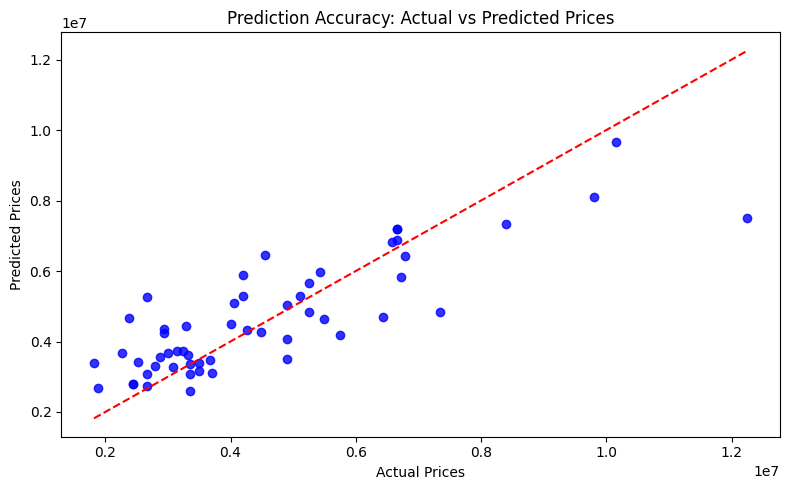

In [ ]:
param_grid = {
    'alpha': [0.1, 0.5, 1, 2, 5, 10, 20],
    'solver': ['auto', 'svd', 'lsqr', 'sparse_cg']
}

ridge_gridSearch = GridSearchCV(
    estimator=Ridge(),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=2
)

ridge_gridSearch.fit(X_train, y_train)
print("Best Parameters found for Ridge Regressor:", ridge_gridSearch.best_params_, '\n')

ridge_bestModel = ridge_gridSearch.best_estimator_
y_pred = ridge_bestModel.predict(X_test)
ridgeRegressor_score2 = generate_performanceReport(y_test, y_pred)
plot_predictionAccuracy(y_test, y_pred)

ridgeRegressor_score = max(ridgeRegressor_score1, ridgeRegressor_score2)

### Lasso Linear Regression

******************** PERFORMANCE REPORT ********************
************************************************************
Mean Sqaure Error:        1451838919329.57
Mean Absolute Error:      875812.94
Root Mean Sqaure Error:   1204922.79
R2 Score:                 0.6875
************************************************************


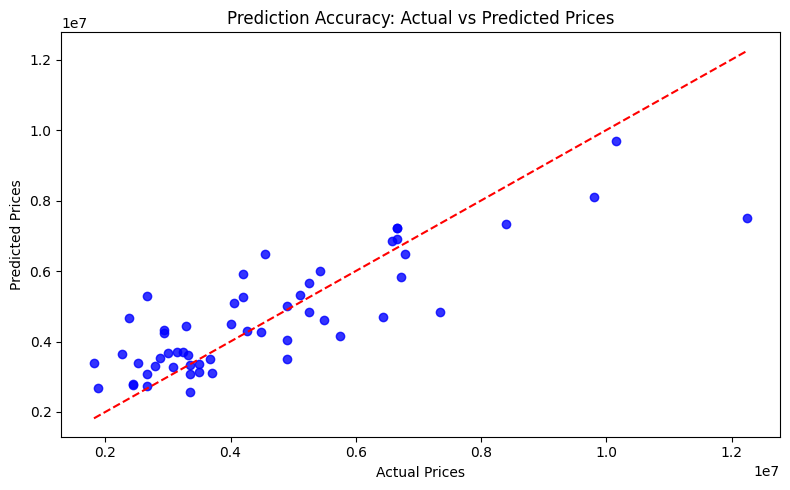

In [ ]:
from sklearn.linear_model import Lasso
lassoRegressor = Lasso().fit(X_train, y_train)
y_pred = lassoRegressor.predict(X_test)
lassoRegressor_score1 = generate_performanceReport(y_test, y_pred)
plot_predictionAccuracy(y_test, y_pred)

HYPER-PARAMETER TUNING

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters found for Lasso Regressor: {'alpha': 100, 'selection': 'random'} 

******************** PERFORMANCE REPORT ********************
************************************************************
Mean Sqaure Error:        1451763104376.62
Mean Absolute Error:      875806.24
Root Mean Sqaure Error:   1204891.32
R2 Score:                 0.6875
************************************************************


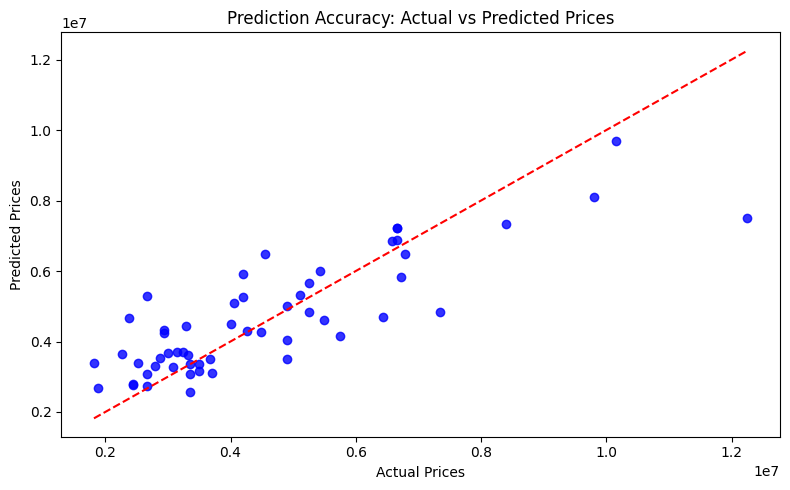

In [ ]:
param_grid = {
    'alpha': [0.1, 0.5, 1, 2, 5, 10, 20, 50, 100],
    'selection': ['cyclic', 'random']
}

lasso_gridSearch = GridSearchCV(
    estimator=Lasso(),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=2
)

lasso_gridSearch.fit(X_train, y_train)
print("Best Parameters found for Lasso Regressor:", lasso_gridSearch.best_params_, '\n')

lasso_bestModel = lasso_gridSearch.best_estimator_
y_pred = lasso_bestModel.predict(X_test)
lassoRegressor_score2 = generate_performanceReport(y_test, y_pred)
plot_predictionAccuracy(y_test, y_pred)

lassoRegressor_score = max(lassoRegressor_score1, lassoRegressor_score2)

### Elastic Linear Regression

******************** PERFORMANCE REPORT ********************
************************************************************
Mean Sqaure Error:        1730716499874.87
Mean Absolute Error:      1018544.76
Root Mean Sqaure Error:   1315566.99
R2 Score:                 0.6275
************************************************************


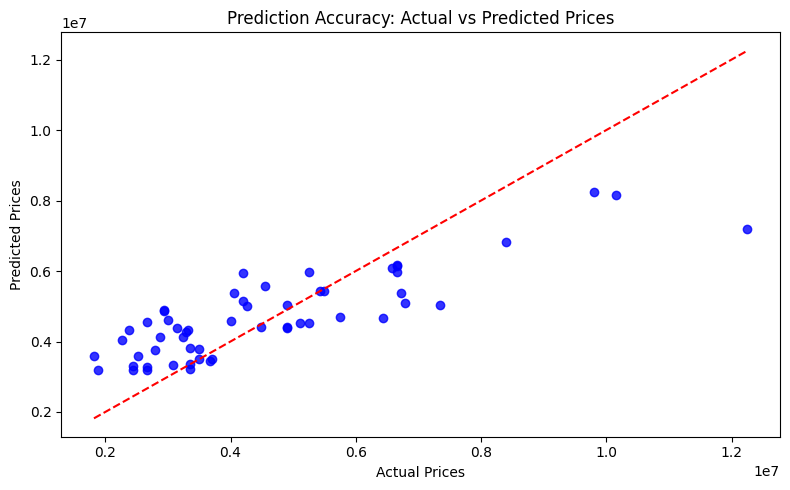

In [ ]:
from sklearn.linear_model import ElasticNet
elasticRegressor = ElasticNet().fit(X_train, y_train)
y_pred = elasticRegressor.predict(X_test)
elasticRegressor_score1 = generate_performanceReport(y_test, y_pred)
plot_predictionAccuracy(y_test, y_pred)

HYPER-PARAMETER TUNING

Fitting 10 folds for each of 140 candidates, totalling 1400 fits
Best Parameters found for elastic Regressor: {'alpha': 0.1, 'l1_ratio': 0.7, 'selection': 'random', 'warm_start': True} 

******************** PERFORMANCE REPORT ********************
************************************************************
Mean Sqaure Error:        1449750469687.61
Mean Absolute Error:      885855.28
Root Mean Sqaure Error:   1204055.84
R2 Score:                 0.6880
************************************************************


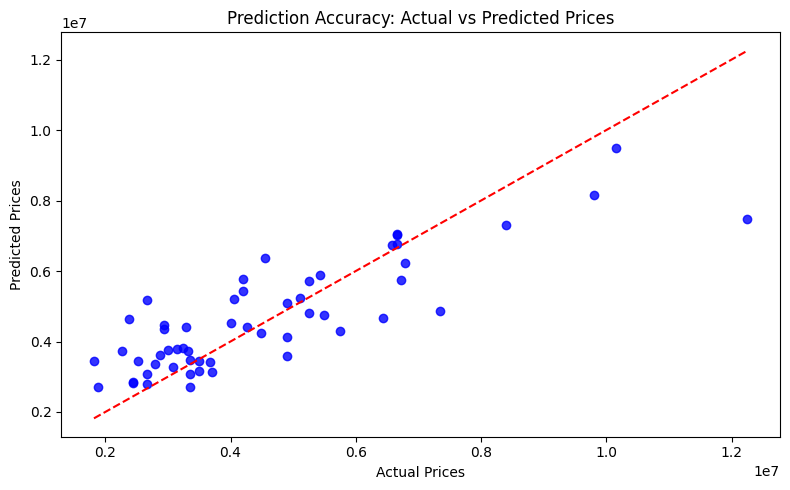

In [ ]:
param_grid = {
    'alpha': [0.1, 0.5, 1, 2, 5, 10, 20],
    'l1_ratio': [0.1, 0.2, 0.5, 0.7, 0.9],
    'selection': ['cyclic', 'random'],
    'warm_start': [True, False]
}

elastic_gridSearch = GridSearchCV(
    estimator=ElasticNet(),
    param_grid=param_grid,
    scoring='r2',
    cv=10,
    n_jobs=-1,
    verbose=2
)

elastic_gridSearch.fit(X_train, y_train)
print("Best Parameters found for elastic Regressor:", elastic_gridSearch.best_params_, '\n')

elastic_bestModel = elastic_gridSearch.best_estimator_
y_pred = elastic_bestModel.predict(X_test)
elasticRegressor_score2 = generate_performanceReport(y_test, y_pred)
plot_predictionAccuracy(y_test, y_pred)

elasticRegressor_score = max(elasticRegressor_score1, elasticRegressor_score2)

### Comparisons

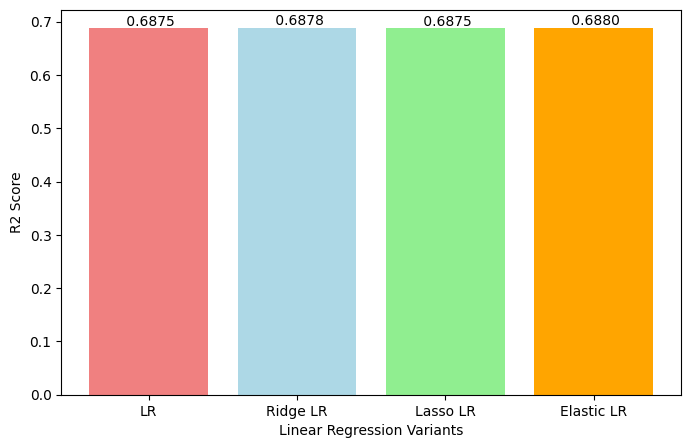

In [ ]:
LR_models = {
    'LR': LR_score,
    'Ridge LR': ridgeRegressor_score,
    'Lasso LR': lassoRegressor_score,
    'Elastic LR': elasticRegressor_score
}

plt.figure(figsize=(8, 5))
bars = plt.bar(LR_models.keys(), LR_models.values(), color=['lightcoral', 'lightblue', 'lightgreen', 'orange'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height: .4f}',
             ha='center',
             va='bottom')
plt.xlabel('Linear Regression Variants')
plt.ylabel('R2 Score')
plt.show()

## Random Forest Regressor

******************** PERFORMANCE REPORT ********************
************************************************************
Mean Sqaure Error:        1813982823294.17
Mean Absolute Error:      966345.35
Root Mean Sqaure Error:   1346841.80
R2 Score:                 0.6096
************************************************************


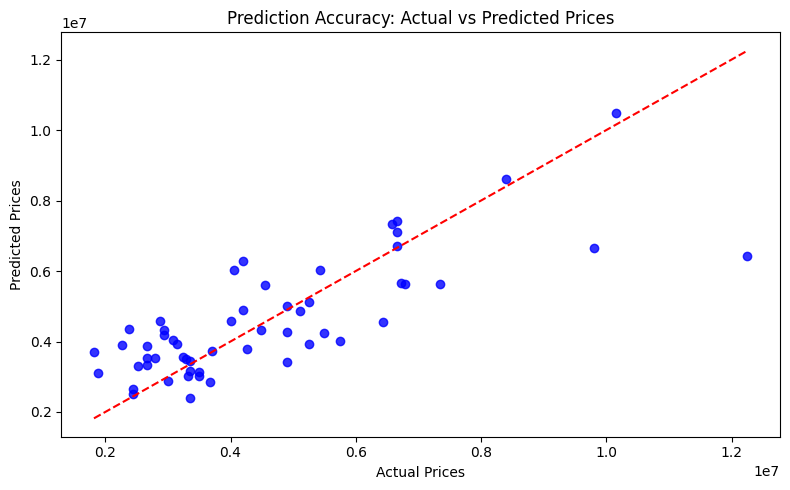

In [ ]:
from sklearn.ensemble import RandomForestRegressor
randomForestRegressor = RandomForestRegressor(random_state = 35).fit(X_train, y_train)
y_pred = randomForestRegressor.predict(X_test)
RFR_score1 = generate_performanceReport(y_test, y_pred)
plot_predictionAccuracy(y_test, y_pred)

HYPER-PARAMETER TUNING

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters for Random Forest Regressor model: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'squared_error'} 

******************** PERFORMANCE REPORT ********************
************************************************************
Mean Sqaure Error:        1691906606620.24
Mean Absolute Error:      957861.69
Root Mean Sqaure Error:   1300733.10
R2 Score:                 0.6359
************************************************************


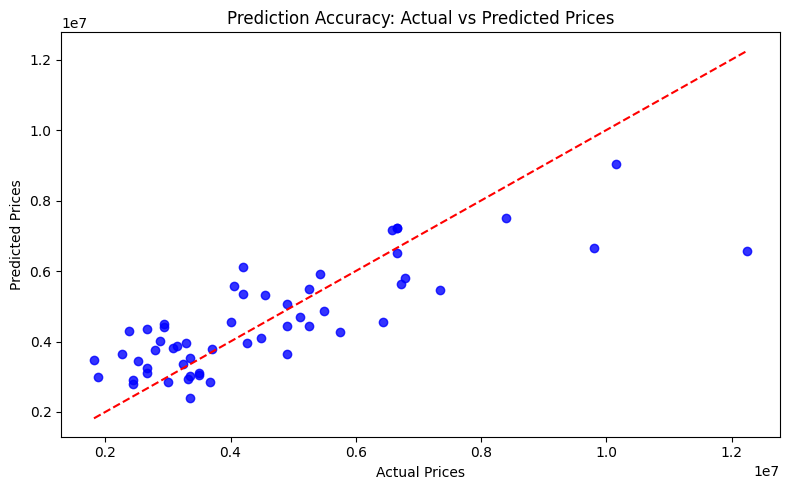

In [ ]:
param_grid = {
    'n_estimators': [10, 50, 100, 200, 400],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

RFR_randomSearch = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=35),
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state=35
)

RFR_randomSearch.fit(X_train, y_train)
print('Best Parameters for Random Forest Regressor model:', RFR_randomSearch.best_params_, '\n')

RFR_bestModel = RFR_randomSearch.best_estimator_
y_pred = RFR_bestModel.predict(X_test)
RFR_score2 = generate_performanceReport(y_test, y_pred)
plot_predictionAccuracy(y_test, y_pred)

RFR_score = max(RFR_score1, RFR_score2)

## Theil Sen Regressor

******************** PERFORMANCE REPORT ********************
************************************************************
Mean Sqaure Error:        1457114088328.92
Mean Absolute Error:      883685.59
Root Mean Sqaure Error:   1207109.81
R2 Score:                 0.6864
************************************************************


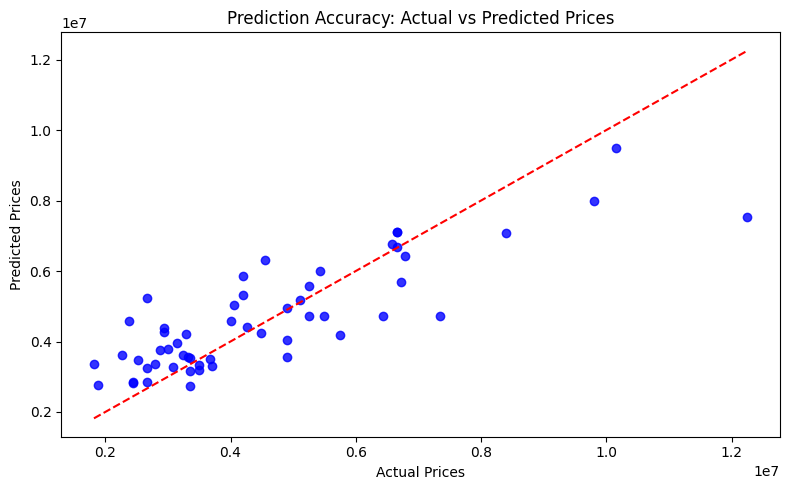

In [ ]:
from sklearn.linear_model import TheilSenRegressor
theilSenRegressor = TheilSenRegressor(random_state=42).fit(X_train, y_train)
y_pred = theilSenRegressor.predict(X_test)
theilSenRegressor_score1 = generate_performanceReport(y_test, y_pred)
plot_predictionAccuracy(y_test, y_pred)

HYPER-PARAMETER TUNING

Fitting 5 folds for each of 672 candidates, totalling 3360 fits
Best Parameters found for Theil Sen Regressor: {'max_iter': 100, 'max_subpopulation': 100, 'n_subsamples': 300, 'random_state': 42, 'tol': 1e-05} 

******************** PERFORMANCE REPORT ********************
************************************************************
Mean Sqaure Error:        1451587735571.53
Mean Absolute Error:      875233.96
Root Mean Sqaure Error:   1204818.55
R2 Score:                 0.6876
************************************************************


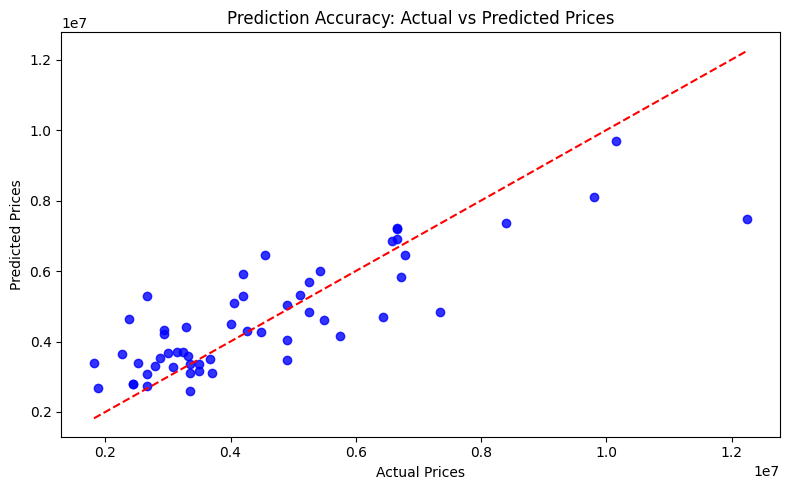

In [ ]:
param_grid = {
    'max_subpopulation': [50, 100, 200, 400, 500, 1000],
    'max_iter': [100, 300, 500, 1000],
    'tol': [1e-5, 1e-4, 1e-3, 1e-2],
    'n_subsamples': [None, 100, 200, 300, 400, 500, 600],
    'random_state': [42]
}

TSR_gridSearch = GridSearchCV(
    estimator=TheilSenRegressor(),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=2
)

TSR_gridSearch.fit(X_train, y_train)
print("Best Parameters found for Theil Sen Regressor:", TSR_gridSearch.best_params_, '\n')

TSR_bestModel = TSR_gridSearch.best_estimator_
y_pred = TSR_bestModel.predict(X_test)
theilSenRegressor_score2 = generate_performanceReport(y_test, y_pred)
plot_predictionAccuracy(y_test, y_pred)

theilSenRegressor_score = max(theilSenRegressor_score1, theilSenRegressor_score2)

## KNN Regression

******************** PERFORMANCE REPORT ********************
************************************************************
Mean Sqaure Error:        2229651659454.55
Mean Absolute Error:      1086260.00
Root Mean Sqaure Error:   1493201.81
R2 Score:                 0.5201
************************************************************


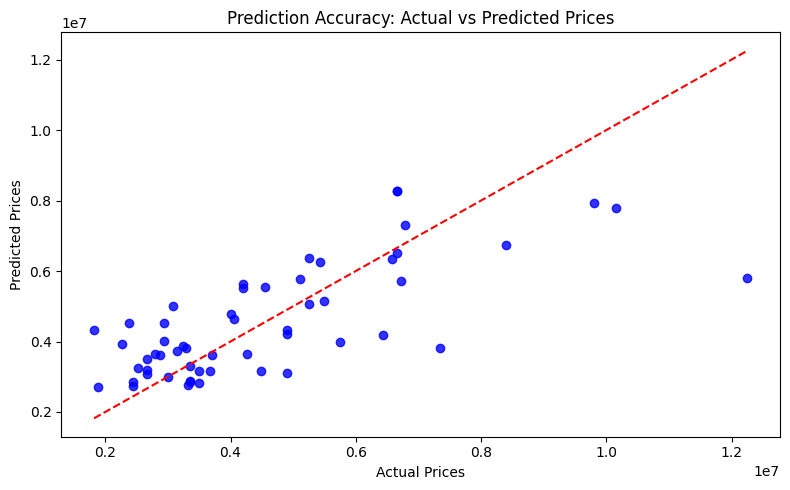

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
kNNRegressor = KNeighborsRegressor().fit(X_train_scaled, y_train)
y_pred = kNNRegressor.predict(X_test_scaled)
kNNRegressor_score1 = generate_performanceReport(y_test, y_pred)
plot_predictionAccuracy(y_test, y_pred)

HYPER-PARAMETER TUNING

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best Parameters found for k Neighbors Regressor: {'algorithm': 'brute', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'} 

******************** PERFORMANCE REPORT ********************
************************************************************
Mean Sqaure Error:        1904371640194.52
Mean Absolute Error:      956356.49
Root Mean Sqaure Error:   1379989.72
R2 Score:                 0.5901
************************************************************


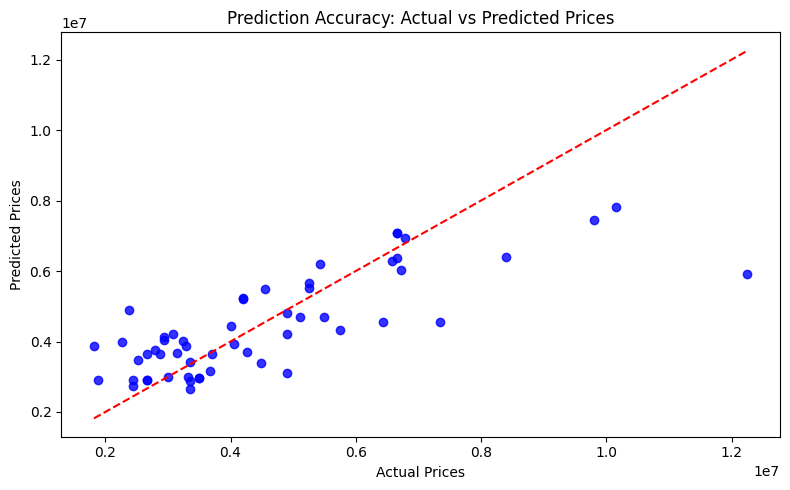

In [ ]:
param_grid = {
    'n_neighbors': [1, 2, 5, 10, 15, 20, 25, 30, 50, 100],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

kNNR_gridSearch = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=2
)

kNNR_gridSearch.fit(X_train_scaled, y_train)
print("Best Parameters found for k Neighbors Regressor:", kNNR_gridSearch.best_params_, '\n')

kNNR_bestModel = kNNR_gridSearch.best_estimator_
y_pred = kNNR_bestModel.predict(X_test_scaled)
kNNRegressor_score2 = generate_performanceReport(y_test, y_pred)
plot_predictionAccuracy(y_test, y_pred)

kNNRegressor_score = max(kNNRegressor_score1, kNNRegressor_score2)

## Gradient Boosting Regressor

******************** PERFORMANCE REPORT ********************
************************************************************
Mean Sqaure Error:        1686152353125.29
Mean Absolute Error:      928318.15
Root Mean Sqaure Error:   1298519.29
R2 Score:                 0.6371
************************************************************


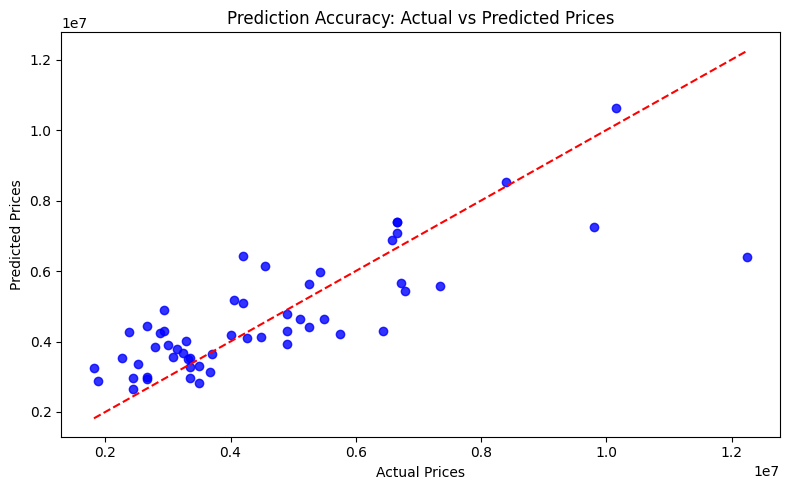

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(random_state=42).fit(X_train, y_train)
y_pred = GBR.predict(X_test)
GBR_score1 = generate_performanceReport(y_test, y_pred)
plot_predictionAccuracy(y_test, y_pred)

HYPER-PARAMETER TUNING

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters for Gradient Boosting Regressor model: {'subsample': 0.1, 'n_estimators': 500, 'loss': 'squared_error', 'learning_rate': 0.01, 'criterion': 'friedman_mse'} 

******************** PERFORMANCE REPORT ********************
************************************************************
Mean Sqaure Error:        1553375613776.32
Mean Absolute Error:      881713.90
Root Mean Sqaure Error:   1246344.90
R2 Score:                 0.6657
************************************************************


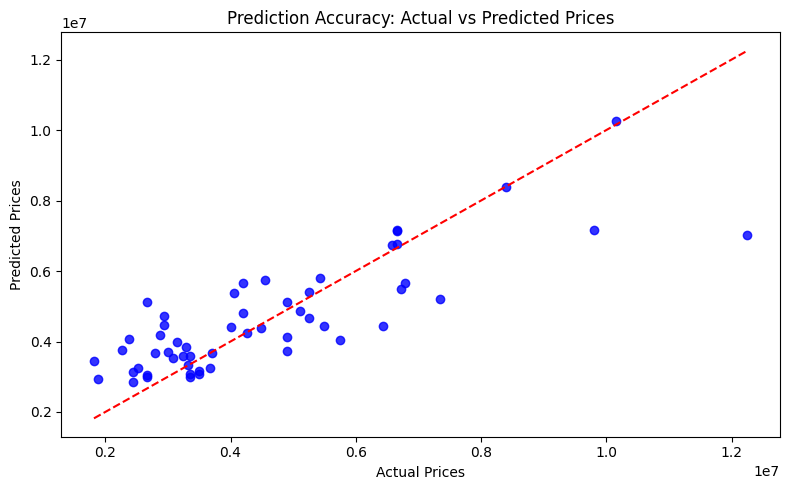

In [ ]:
param_grid = {
    'loss': ['squared_error'],
    'learning_rate': [0.01, 0.1, 0.2, 0.5, 1, 10],
    'n_estimators': [100, 200, 500],
    'criterion': ['friedman_mse'],
    'subsample': [0.1, 0.2, 0.5, 1.0]
}

GBR_randomSearch = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=30,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
)

GBR_randomSearch.fit(X_train, y_train)
print('Best Parameters for Gradient Boosting Regressor model:', GBR_randomSearch.best_params_, '\n')

GBR_bestModel = GBR_randomSearch.best_estimator_
y_pred = GBR_bestModel.predict(X_test)
GBR_score2 = generate_performanceReport(y_test, y_pred)
plot_predictionAccuracy(y_test, y_pred)

GBR_score = max(GBR_score1, GBR_score2)

## Summary

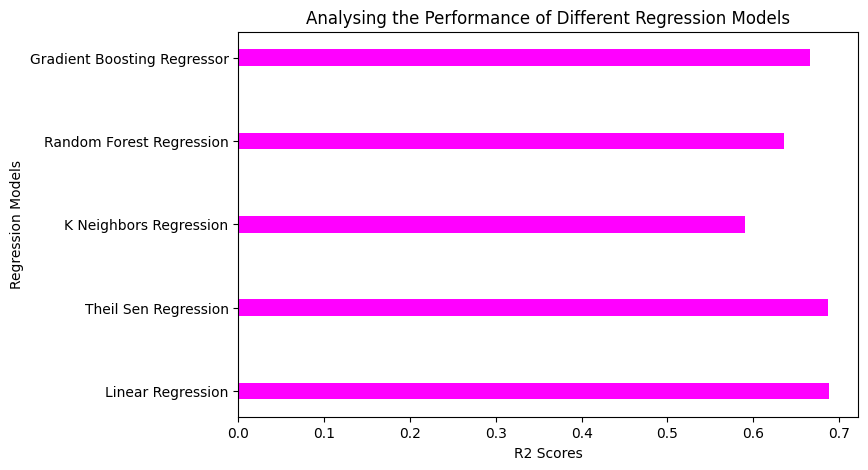

In [ ]:
scores = [elasticRegressor_score, theilSenRegressor_score, kNNRegressor_score, RFR_score, GBR_score]
models = ['Linear Regression', 'Theil Sen Regression', 'K Neighbors Regression', 'Random Forest Regression', 'Gradient Boosting Regressor']
plt.figure(figsize=(8, 5))
plt.barh(models, scores, height=0.2, color='magenta',)
plt.xlabel('R2 Scores')
plt.ylabel('Regression Models')
plt.title('Analysing the Performance of Different Regression Models')
plt.show()

# Feature Selection

## PCA Decomposition

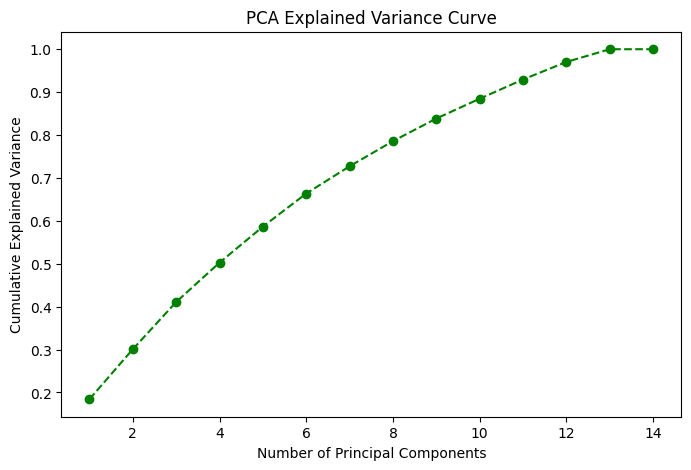

In [ ]:
from sklearn.decomposition import PCA
X_scaled = StandardScaler().fit_transform(X)
pca = PCA()
pca.fit(X_scaled)
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cum_var_exp)+1), cum_var_exp, marker='o', linestyle='--', color='green')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance Curve')
plt.show()

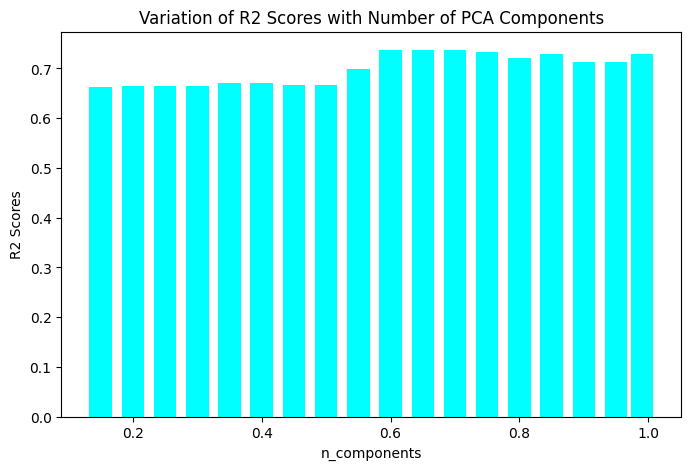

In [ ]:
n_components = [0.99, 0.95, 0.90, 0.85, 0.80, 0.75, 0.70, 0.65, 0.60, 0.55, 0.50, 0.45, 0.40, .35, 0.30, 0.25, 0.20, 0.15]
R2_scores = []
for component in n_components:
  X_pca = PCA(component).fit_transform(X_scaled)
  X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, random_state=35, test_size=0.1)
  elasticRegressor = ElasticNet(alpha=0.1, l1_ratio=0.7, selection='random', warm_start=True).fit(X_pca_train, y_train)
  R2_scores.append(elasticRegressor.score(X_pca_test, y_test))

plt.figure(figsize=(8, 5))
plt.bar(n_components, R2_scores, width=0.035, color='cyan')
plt.xlabel('n_components')
plt.ylabel('R2 Scores')
plt.title('Variation of R2 Scores with Number of PCA Components')
plt.show()

******************** PERFORMANCE REPORT ********************
************************************************************
Mean Sqaure Error:        626659967108.81
Mean Absolute Error:      640576.67
Root Mean Sqaure Error:   791618.57
R2 Score:                 0.7371
************************************************************


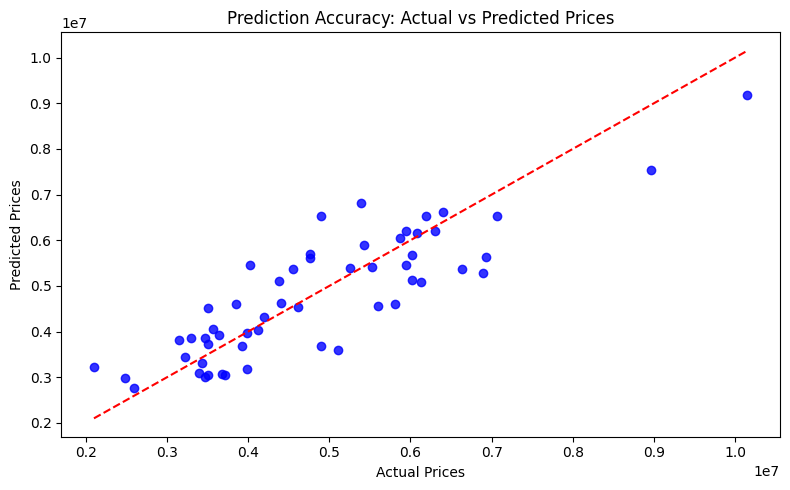

In [ ]:
numComponents = n_components[np.argmax(R2_scores)]
X_pca = PCA(numComponents).fit_transform(X_scaled)
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, random_state=35, test_size=0.1)
elasticRegressor = ElasticNet(alpha=0.1, l1_ratio=0., selection='cyclic', warm_start=True).fit(X_pca_train, y_train)
y_pred = elasticRegressor.predict(X_pca_test)
generate_performanceReport(y_test, y_pred)
plot_predictionAccuracy(y_test, y_pred)

## Correlation as Feature Selection

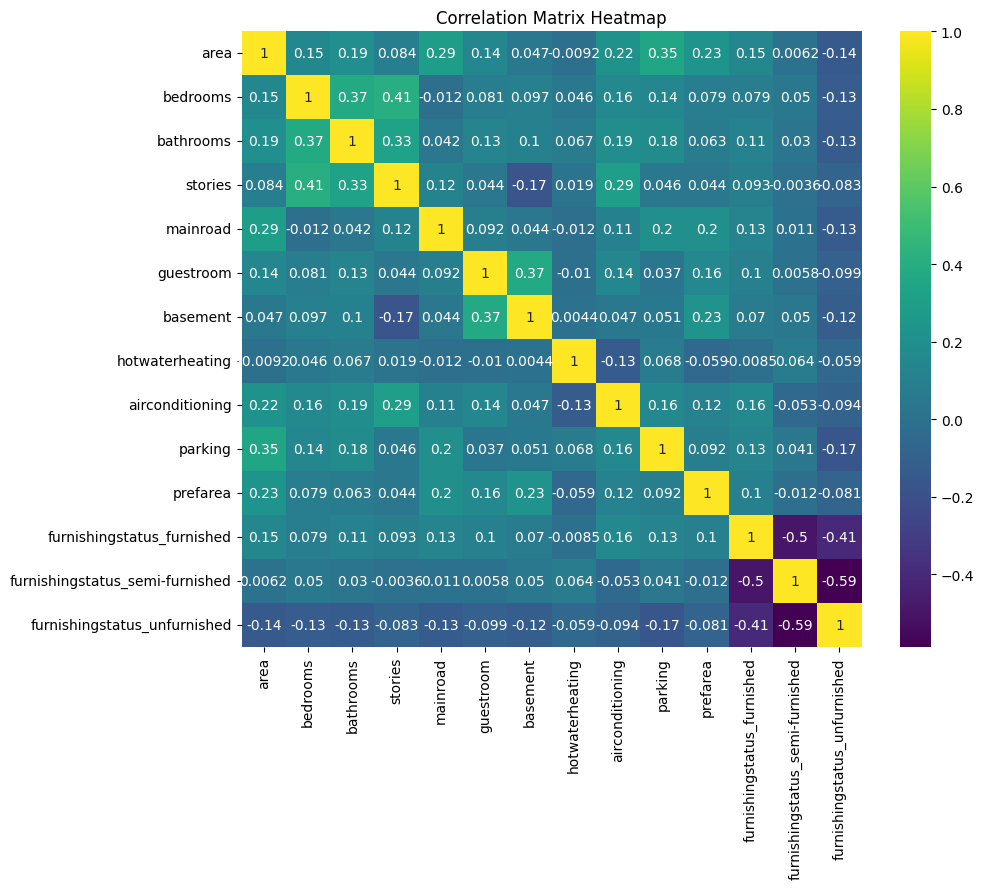

In [ ]:
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='viridis', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

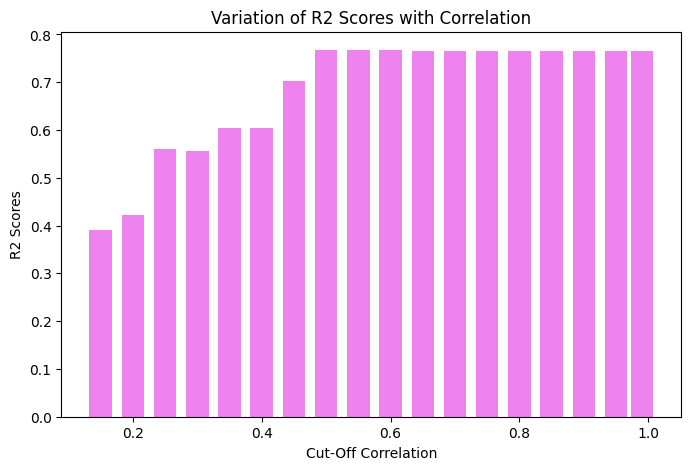

In [ ]:
thresholdValues = [0.95, 0.90, 0.85, 0.80, 0.75, 0.70, 0.65, 0.60, 0.55, 0.50, 0.45, 0.40, 0.35, 0.30, 0.25, 0.20, 0.15, 0.10]
R2_scores = []
for cutOff in thresholdValues:
  to_drop = [column for column in upper.columns if any(upper[column] > cutOff)]
  X_reduced = X.drop(columns=to_drop)
  X_reduced_train, X_reduced_test, y_train, y_test = train_test_split(X_reduced, y, random_state=35, test_size=0.1)
  elasticRegressor = ElasticNet(alpha=0.1, l1_ratio=0.0, selection='cyclic', warm_start=True).fit(X_reduced_train, y_train)
  R2_scores.append(elasticRegressor.score(X_reduced_test, y_test))

plt.figure(figsize=(8, 5))
plt.bar(n_components, R2_scores, width=0.035, color='violet')
plt.xlabel('Cut-Off Correlation')
plt.ylabel('R2 Scores')
plt.title('Variation of R2 Scores with Correlation')
plt.show()

******************** PERFORMANCE REPORT ********************
************************************************************
Mean Sqaure Error:        554753258885.23
Mean Absolute Error:      623056.85
Root Mean Sqaure Error:   744817.60
R2 Score:                 0.7672
************************************************************


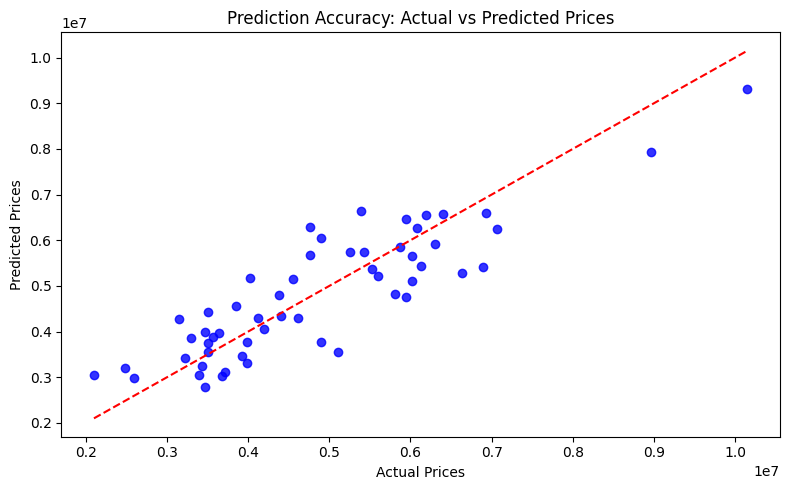

In [ ]:
cutOffValue = thresholdValues[np.argmax(R2_scores)]
to_drop = [column for column in upper.columns if any(upper[column] > cutOffValue)]
X_reduced = X.drop(columns=to_drop)
X_reduced_train, X_reduced_test, y_train, y_test = train_test_split(X_reduced, y, random_state=35, test_size=0.1)
elasticRegressor = ElasticNet(alpha=0.1, l1_ratio=0.0, selection='cyclic', warm_start=True).fit(X_reduced_train, y_train)
y_pred = elasticRegressor.predict(X_reduced_test)
generate_performanceReport(y_test, y_pred)
plot_predictionAccuracy(y_test, y_pred)

# Conclusion

We looked at the following **Objectives**:

* Understanding the dataset & distribution of Features and Target Values.

* Pre-Processing the dataset:
    * Handling categorical feature vectors using one-hot encoding.
    * Scaling the dataset in [0, 1] for some regression models.

* Building and training various Regression models to predict the house prices.

* Using GridSearchCV and RandomizedSearchCV for hyper-parameter Tuning.

* Evaluating the performance of the models:
   * Generating the performance report based on various scores: R2,  mean square error, root mean square error and mean absolute error.

   * Plotting the predicted price values vs actual price values.

* Using PCA and Correlation matrix as feature selection techniques.

**Results:**
Elastic Linear Regression with the following parameters:
* alpha=0.1
* l1_ratio=0.0

performed best on the dataset after removing features based on correlation cut-off of 0.55. The final R2 score was 0.77